# Ejemplo para graficar un campo de temperatura a 2m y líneas de corriente.
#*Example to plot a 2-m temperatura and streamlines.*

In [2]:
# Importamos las librerías necesarias  (en caso de ser necesario, instalar utilizando el comando pip install)
# We import the necessary libraries    (if needed, install by using the command pip install)
import xarray as xr
import h5netcdf
import datetime
import s3fs
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import metpy.calc as mpcalc

Definimos la fecha y hora de inicialización del pronóstico: <br />
*We define the forecast initialization date:* 

In [3]:
init_year = 2022
init_month = 10
init_day = 27
init_hour = 0
START_DATE = datetime.datetime(init_year, init_month, init_day, init_hour)

Definimos el plazo de pronóstico a graficar: <br />
*We define the forecast lead time to plot:*

In [4]:
lead_time = 12

Leemos el archivo: <br />
*We read the file:*

In [5]:
filename = 'WRFDETAR_01H_{:%Y%m%d_%H}_{:03d}.nc'.format(START_DATE,lead_time) 
print(filename)
ds = xr.open_dataset(filename, decode_coords = 'all', engine = 'h5netcdf')

WRFDETAR_01H_20221027_00_012.nc


Calculamos las componentes zonal y meridional del viento a 10m: <br />
*We calculate the zonal and meridional components of 10-m wind:*




In [6]:
u, v = mpcalc.wind_components(ds['magViento10'], ds['dirViento10'])

u = u.metpy.dequantify()
v = v.metpy.dequantify()

Generamos la figura: <br />
*We generate the plot:*

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/geoaxes.py:1703: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDe

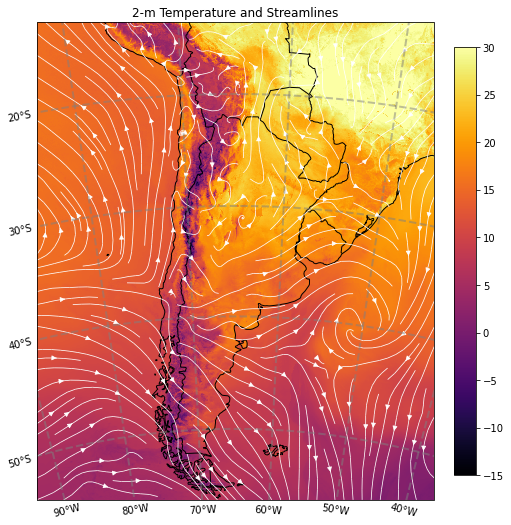

In [13]:
# Seleccionamos la proyección de los datos
# We chose a map projection

projection = ccrs.LambertConformal(ds.CEN_LON, ds.CEN_LAT, standard_parallels = (ds.TRUELAT1, ds.TRUELAT2), cutoff = -5)

fig, ax = plt.subplots(1, 1, figsize = (7, 10), constrained_layout = True, subplot_kw = {'projection': projection})
ax.set_extent(extents=[-500*4000, 500*4000, -600*4000, 600*4000], crs = projection)
cs = ax.pcolormesh(ds['lon'], ds['lat'], ds['T2'][0, :, :], vmin = -15, vmax = 30, cmap = 'inferno', transform = ccrs.PlateCarree())
strm = ax.streamplot(ds['lon'].values, ds['lat'].values, u[0, :, :].values, v[0, :, :].values, density = [1.5, 1.5], color = 'white', linewidth = 0.75, transform = ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)
ax.set_title(f'2-m Temperature and Streamlines')
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, x_inline = False,
                  linewidth = 2, color = 'gray', alpha = 0.5, linestyle = '--')
gl.top_labels = False
gl.right_labels = False
plt.colorbar(cs, shrink = 0.6)
plt.show()